<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except IOError:
    data = pd.read_csv('real_estate_data.csv', sep='\t')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [3]:
pd.set_option('display.max_columns', None)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Вывод

Первое, что стоит отметить, это то, что разделить в csv-файле - знак табуляции.
Сам файл содержит 23699 объявлений о продаже квартир и соответственно такое же количество строк. Каждая строка содержит 22 столбца, которые характеризуют квартиры из объявлений.
Сразу заметно, что данные нуждаются в обработке. Есть много столбцов с пропусками, некоторые столбцы требуют изменения типа данных. Возможно есть какие-то другие проблемы с данными, исследуем это подробнее.

## Предобработка данных

### Изменение названий столбцов

Из `info()` видно, что стобцы `cityCenters_nearest`, `parks_around3000`, `ponds_around3000` не соответствуют стилю `snake_case`.
Исправим это.

In [14]:
data = data.rename(columns={
    'cityCenters_nearest': 'city_centers_nearest',
    'parks_around3000': 'parks_around_3000',
    'ponds_around3000': 'ponds_around_3000'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
city_centers_nearest    18180 non-null float64
parks_around_3000       18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around_30

### Обработка пропусков

Пропуски есть в следующих столбцах:

In [16]:
for column in data.columns:
    is_null = data[column].isna().sum()
    if is_null:
        print(f"{column:<30}: {is_null}")

ceiling_height                : 9195
floors_total                  : 86
living_area                   : 1903
is_apartment                  : 20924
kitchen_area                  : 2278
balcony                       : 11519
locality_name                 : 49
airports_nearest              : 5542
city_centers_nearest          : 5519
parks_around_3000             : 5518
parks_nearest                 : 15620
ponds_around_3000             : 5518
ponds_nearest                 : 14589
days_exposition               : 3181


#### Название населенного пункта `locality_name`

Создадим датафрейм, в котором строки с пропущеными названия населенных пунктов и столбцы, которые характеризуют их относительное географическое положение:

In [19]:
empty_locality_name = data.loc[
    data['locality_name'].isna(), [
            'airports_nearest',
            'city_centers_nearest',
            'parks_around_3000',
            'parks_nearest',
            'ponds_around_3000',
            'ponds_nearest']]

А теперь сводную таблицу по `locality_name` и среднему расстоянию до географических ориентиров:

In [27]:
pivot_locality_geography = data.pivot_table(
    index='locality_name',
    values=[
        'airports_nearest',
        'city_centers_nearest',
        'parks_around_3000',
        'parks_nearest',
        'ponds_around_3000',
        'ponds_nearest'])

Выведем эти таблицы, отсортировав для начала по расстоянию до аэропорта

In [29]:
pivot_locality_geography.sort_values(by='airports_nearest')

,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest
locality_name,,,,,,
посёлок Александровская,12896.500000,27468.000000,0.000000,NaN,1.000000,711.500000
посёлок Шушары,16061.458716,24243.387615,0.000000,NaN,0.348624,573.217105
Пушкин,16447.869919,28745.375000,0.747967,404.297170,0.872629,482.988701
посёлок Петро-Славянка,20605.000000,27165.000000,0.000000,NaN,2.000000,663.000000
Павловск,21053.342105,33206.921053,1.552632,379.538462,1.842105,493.382353
посёлок Металлострой,25726.484848,27561.348485,0.000000,NaN,0.000000,NaN
Колпино,26375.863501,32113.771513,0.522255,495.481203,0.997033,532.268421
посёлок Усть-Ижора,26510.500000,28222.500000,0.000000,NaN,0.000000,NaN
Красное Село,26595.579545,30020.284091,0.494318,466.086957,0.090909,445.500000


In [30]:
empty_locality_name.sort_values(by='airports_nearest')

,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest
5343,10556.0,9538.0,1.0,67.0,0.0,NaN
23214,11206.0,8943.0,0.0,NaN,0.0,NaN
18526,11206.0,8943.0,0.0,NaN,0.0,NaN
7114,14031.0,8582.0,0.0,NaN,0.0,NaN
8986,19659.0,31813.0,0.0,NaN,0.0,NaN
21119,19744.0,31897.0,0.0,NaN,0.0,NaN
13690,20234.0,23659.0,0.0,NaN,2.0,296.0
16610,21219.0,1322.0,1.0,740.0,3.0,365.0
5707,21460.0,16788.0,0.0,NaN,1.0,170.0
18917,21540.0,8429.0,0.0,NaN,3.0,142.0


Для нескольких объявлений полностью отсутствует информация о названии и географических ориентирах. Их всего 8, нам придется просто исключить их из нашего датафрейма

In [35]:
bad_index = (empty_locality_name[empty_locality_name['airports_nearest'].isna()]
             .index
             .to_list())
print(f'Удалить строки: ')

SyntaxError: can't use starred expression here (861810161.py, line 7)

#### Высота потолков `ceiling_height`


Изучим содержимое столбца `ceiling_height`

In [4]:
plt.rcParams['figure.figsize'] = [9, 6] # зададим размер окна для графиков

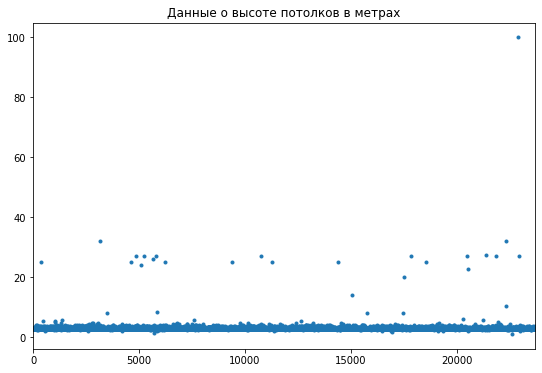

In [5]:
data['ceiling_height'].plot(style='.', title='Данные о высоте потолков в метрах')

Как видно из визуализации данных `ceiling_height`, основная часть значений сосредоточена в районе 2-3 метров.
Обычно не бывает квартир с высотой потолков меньше 2.40 м. Проверим это в нашей таблице.

In [6]:
data[data['ceiling_height'] < 2.40].sort_values(by='ceiling_height')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22590,16,6000000.0,55.00,2018-10-31T00:00:00,2,1.00,12.0,32.400000,7,NaN,False,False,10.00,NaN,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0
5712,5,1500000.0,42.80,2017-08-14T00:00:00,2,1.20,2.0,27.500000,1,NaN,False,False,5.20,NaN,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
16934,5,4100000.0,40.00,2017-10-17T00:00:00,1,1.75,37.0,17.400000,5,NaN,False,False,8.34,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
16446,6,12300000.0,88.30,2019-03-12T00:00:00,3,2.00,5.0,63.900000,2,NaN,False,False,12.00,NaN,Санкт-Петербург,38415.0,7675.0,1.0,568.0,1.0,154.0,NaN
552,11,2999000.0,33.50,2017-03-30T00:00:00,1,2.00,15.0,17.500000,6,NaN,False,False,6.50,NaN,Санкт-Петербург,33972.0,11746.0,1.0,520.0,1.0,949.0,270.0
2572,4,2400000.0,62.00,2018-12-27T00:00:00,3,2.00,5.0,40.000000,4,NaN,False,False,6.00,1.0,Луга,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4212,1,2120000.0,35.43,2017-12-18T00:00:00,1,2.00,18.0,16.600000,9,NaN,False,False,8.80,2.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,36.0
20520,9,3600000.0,38.00,2018-07-05T00:00:00,1,2.00,12.0,15.000000,9,NaN,False,False,11.80,1.0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,62.0
5850,9,1650000.0,35.50,2018-05-29T00:00:00,1,2.00,5.0,NaN,5,NaN,False,False,NaN,NaN,Луга,NaN,NaN,NaN,NaN,NaN,NaN,100.0
11352,4,3300000.0,36.00,2017-06-18T00:00:00,1,2.00,17.0,15.200000,12,NaN,False,False,10.10,0.0,посёлок Металлострой,25268.0,26980.0,0.0,NaN,0.0,NaN,53.0


Высоту потолка 2.2м в 2-х этажном доме в селе Копорье хоть и с трудом, но можно допустить, а всё, что ниже не может быть правдой. С другой стороны, хорошо, что таких значений мало, около 15.

Теперь посмотрим внимательнее на строки, где высота потолков неправдоподобно большая.

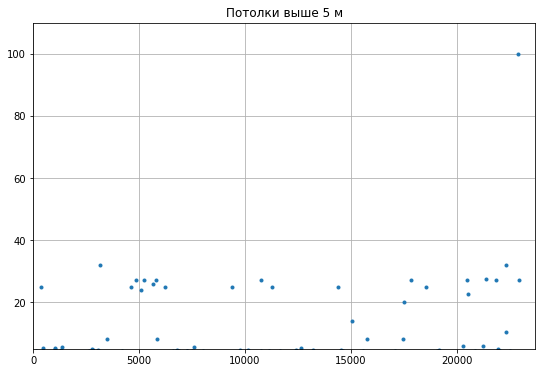

In [10]:
data['ceiling_height'].plot(style='.', title='Потолки выше 5 м', ylim=(5, 110), grid=True)

In [8]:
data[data['ceiling_height'] > 5].sort_values(by='ceiling_height')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
464,15,66571000.0,280.3,2015-06-11T00:00:00,6,5.2,8.0,159.5,7,NaN,False,False,21.1,0.0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0
12628,14,3900000.0,50.0,2018-03-29T00:00:00,1,5.3,5.0,NaN,5,NaN,False,False,NaN,NaN,Санкт-Петербург,19644.0,3918.0,1.0,505.0,1.0,92.0,8.0
1026,20,155000000.0,310.0,2018-10-12T00:00:00,5,5.3,3.0,190.0,3,NaN,False,False,63.0,2.0,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN
7578,17,38000000.0,143.0,2017-11-02T00:00:00,3,5.5,5.0,83.0,5,NaN,False,False,29.0,1.0,Санкт-Петербург,26333.0,6448.0,3.0,479.0,0.0,NaN,NaN
1388,20,59800000.0,399.0,2015-01-21T00:00:00,5,5.6,6.0,NaN,6,NaN,False,False,NaN,0.0,Санкт-Петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,719.0
21227,0,8200000.0,71.0,2017-07-21T00:00:00,0,5.8,5.0,68.0,5,NaN,True,False,NaN,0.0,Санкт-Петербург,20170.0,1261.0,2.0,295.0,3.0,366.0,30.0
20264,17,119000000.0,187.6,2017-07-10T00:00:00,4,6.0,7.0,147.0,7,NaN,False,False,15.6,NaN,Санкт-Петербург,26902.0,5605.0,3.0,484.0,1.0,305.0,259.0
17442,0,5350000.0,54.0,2015-06-16T00:00:00,2,8.0,5.0,29.0,2,NaN,False,False,NaN,1.0,Красное Село,24638.0,28062.0,0.0,NaN,0.0,NaN,469.0
15743,14,5600000.0,67.0,2016-11-11T00:00:00,3,8.0,16.0,41.0,1,NaN,False,False,8.0,NaN,Санкт-Петербург,32691.0,11035.0,1.0,723.0,0.0,NaN,474.0
3474,3,1400000.0,30.0,2018-03-16T00:00:00,1,8.0,5.0,15.3,2,False,False,False,7.3,NaN,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0


В объявлениях, где высота потолков указана от 24 до 32 метров, почти наверняка просто ошибка в разрядности и нужно поделить высоту на 10

In [69]:
ceiling_height_filter_from24_to_32 = (
        (data['ceiling_height'] >= 24) &
        (data['ceiling_height'] <= 32))
data.loc[ceiling_height_filter_from24_to_32, 'ceiling_height'] /= 10

In [70]:
data.pivot_table(index='locality_name')

,last_price,total_area,ceiling_height,floors_total,floor,locality_name
464,66571000.0,280.3,5.2,8.0,7,Санкт-Петербург
1026,155000000.0,310.0,5.3,3.0,3,Санкт-Петербург
12628,3900000.0,50.0,5.3,5.0,5,Санкт-Петербург
7578,38000000.0,143.0,5.5,5.0,5,Санкт-Петербург
1388,59800000.0,399.0,5.6,6.0,6,Санкт-Петербург
21227,8200000.0,71.0,5.8,5.0,5,Санкт-Петербург
20264,119000000.0,187.6,6.0,7.0,7,Санкт-Петербург
3474,1400000.0,30.0,8.0,5.0,2,деревня Нурма
15743,5600000.0,67.0,8.0,16.0,1,Санкт-Петербург
17442,5350000.0,54.0,8.0,5.0,2,Красное Село


## Расчёты и добавление результатов в таблицу

## Исследовательский анализ данных

## Общий вывод

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [ ]  определены пропущенные значения
- [ ]  заполнены пропущенные значения
- [ ]  есть пояснение, какие пропущенные значения обнаружены
- [ ]  изменены типы данных
- [ ]  есть пояснение, в каких столбцах изменены типы и почему
- [ ]  посчитано и добавлено в таблицу: цена квадратного метра
- [ ]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [ ]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [ ]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [ ]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [ ]  построены гистограммы для каждого параметра
- [ ]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [ ]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [ ]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [ ]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [ ]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [ ]  в каждом этапе есть выводы
- [ ]  есть общий вывод